"A linear homogeneous first-order system of differential equations, w constant coefficients, in the three functions $y_1 (t), y_2(t), y_3(t)$ is a set of equations of the form

$$\left( \begin{matrix} \dot{y_1} \\ \dot{y_2} \\ \dot{y_3} \end{matrix} \right) = \left( \begin{matrix} a_{11} \ a_{12} \ a_{13} \\ a_{21} \ a_{22} \ a_{23} \\ a_{31} \ a_{32} \ a_{33} \end{matrix} \right) \left( \begin{matrix} y_1 \\ y_2 \\ y_3 \end{matrix} \right)$$

where $$\dot{y_1} = \frac {dy_1}{dt}$$

"Consider two cells which contain equal volumes of a salt solution. The boundary between the cells is a semipermeable membrane. Let $y_1(t)$ and $y_2(t)$ represent the amount of salt disolved in cells 1 and 2, respectively. A reasonable assumption is that the rate of change of the amount of salt in a cell due to passage through the membrane is proportional to the difference in the concentrations in the cells. This leads to the equations

$$\dot{y_1} = k (y_2 - y_1)$$

$$\dot{y_2} = k (y_1 - y_2)$$

$$\dot{Y} = \left( \begin{matrix} -k \  ~~~~~~ k \\ ~~~ k \ ~ -k \end{matrix} \right) Y $$

Two solutions exist for these set of equations:

$$Y = \left( \begin{matrix} c \\ c \end{matrix} \right)$$

and

$$Y = \left( \begin{matrix} c e^{-2t} \\ -c e^{-2t} \end{matrix} \right)$$

The solutions are closely related to the eigenvectors and eigenvalues.

$$A = \left( \begin{matrix} -1 \  ~~~~~~ 1 \\ ~~~ 1 \ ~ -1 \end{matrix} \right) $$

which yields the following two eigenpairs:

$$(-2, \left( \begin{matrix} a \\ -a \end{matrix} \right) ) ~~~ \text{and} ~~~ (0, \left( \begin{matrix} b \\ b \end{matrix} \right) )$$

The results indicate that if $(\lambda, X)$ is an eigenpair of $A$, then

$$e^{\lambda t} X$$

is a solution of 

$$\dot{Y} = A Y$$

"Theorem: If $Y_1$ and $Y_2$ are solutions of $\dot{Y} = A Y$ , then $c_1 Y_1 + c_2 Y_2$ is a solution also.

A <b>general solution</b> of the system is

$$c_1 \left( \begin{matrix} 1 \\ 1 \end{matrix} \right) + c_2 \left( \begin{matrix} e^{-2kt}\\ -e^{-2kt} \end{matrix} \right) = \left( \begin{matrix} c_1 + c_2 e^{-2kt} \\ c_1 - c_2 e^{-2kt} \end{matrix} \right)$$

Notice, of course, that as $t \rightarrow \infty$

$$Y \rightarrow \left( \begin{matrix} c_1 \\ c_1 \end{matrix} \right)$$

The diffusion system achieves the equilibrium state of equal concentrations.

"Diffusion problems ordinarily include an <b>initial condition</b>: the amount of salt in each component at $t=0$. For example, if we began the system with $y_1(0) = 2$ and $y_2(0) = 1$, the solution would have to satisfy

$$\left( \begin{matrix} 2 \\ 1 \end{matrix} \right) = \left( \begin{matrix} y_1(0) \\ y_2(0) \end{matrix} \right) = \left( \begin{matrix} c_1 +c_2 e^0 \\ c_1 - c_2 e^0 \end{matrix} \right) = \left( \begin{matrix} c_1 +c_2 \\ c_1-c_2 \end{matrix} \right)$$

or $c_1 = 3/2$ and $c_2 = 1/2$

"To summarize: The general solution to

$$\dot{Y} = A Y$$

where $A$ is diagonalizable with distinct eigenvalues, can be written

$$Y = c_1 e^{-\lambda_1 t} X_1 +c_2 e^{-\lambda_2 t} X_2 + ... + c_n e^{-\lambda_n t} X_n$$ 

where $\lambda_1, \lambda_2 ,... , \lambda_n$ and $X_1, X_2 , ..., X_n$ are the eigenpairs of the matrix $A$. The constants $c_1, c_2, ... , c_n$ are determined exactly when an intitial condition is given.

Finally, if we allow complex solutions of $\text{det} (A - \lambda I) = 0 $ to be used for eigenvalues, we can find solutions which are sine and cosine functions. For example,

$$\dot{Y} = \left( \begin{matrix} 0 \ -1 \\ 1 \ ~~~~~  0\end{matrix} \right) Y$$

has solution 

$$Y = \left( \begin{matrix} \cos t\\ \sin t \end{matrix} \right)$$

Note that the eigenvalues of 

$$\left( \begin{matrix} 0 \ -1 \\ 1 \ ~~~~~  0\end{matrix} \right)$$

are $i$ and $-i$ with eigenvectors $\left( \begin{matrix} 1 \\-i \end{matrix} \right)$ and $\left( \begin{matrix} 1 \\i \end{matrix} \right)$, respectively. Then

$$Y = c_1 e^{-i t} \left( \begin{matrix} 1 \\-i \end{matrix} \right) + c_2 e^{i t} \left( \begin{matrix} 1 \\i \end{matrix} \right) =  \left( \begin{matrix} (c_1 + c_2) \cos t + i(c_2 - c_1) \sin t \\ i(c_2 -c_1) \cos t - (c_1 + c_2) \sin t \end{matrix} \right) $$

hmmm... got myself kind of confused somewhere....

In [1]:
%pylab inline
from numpy.random import choice
from tools import repeat

Populating the interactive namespace from numpy and matplotlib


From: http://math.uchicago.edu/~may/REU2012/REUPapers/ChenB.pdf

The transfer of heat can be modeled using random walks. Consider a graph G.
Heat can be modeled by imagining a large number of particles starting at a position
on the graph, and these particles performing random walks throughout the graph.
At any time, the temperature at a point is the density of the particles at that point.

Let $p_n(x)$ denote the temperature (or the density of particles) at point x in G at
time n. Between time n and time n + 1, heat flows into point x from all adjacent
points in G. Then, the expected heat at time n + 1 at point x is

$$p_{n+1}(x) = \sum_{y \sim x} p_n(y) \frac 1 {deg(y)}$$

In [2]:
#Let's do a square lattice in 2-d
def make_sq_lattice(n):
    nn = n**2
    out = [[0 for i in range(nn)] for j in range(nn)]
    for i in range(n):
        for j in range(n):
            if(j+1 < n):
                out[n*i+j][n*i+j+1] = 1
            if(j-1 >= 0):
                out[n*i+j][n*i+j-1] = 1
            if(i+1 < n):
                out[n*i+j][n*(i+1)+j] = 1
            if(i-1 >= 0):
                out[n*i+j][n*(i-1)+j] = 1
    return array(out)
G = make_sq_lattice(4)
G

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [3]:
n = 4
G = make_sq_lattice(n)
state = [0 for i in range(n**2)]
#let's put 120 heat units on state 0
state[0] = 120
#state = array([ 0,  3,  0, 11,  1,  0, 15,  0,  0, 25,  0, 26,  6,  0, 33,  0])

def diffuse(state, steps):
    for s in range(steps):
        new_state = [0 for i in range(n**2)]
        for i in range(n**2):
            while(state[i]>0):
                state[i] -= 1
                next_pos = choice(len(G), p = G[i]/sum(G[i]))
                new_state[next_pos] += 1
        state = new_state 
        
        
    return array(state)    

diffuse(state, 5)

array([ 0, 24,  0, 13, 25,  0, 18,  0,  0, 13,  0,  2, 14,  0, 11,  0])

In [4]:

out = [0 for i in range(n**2)]
m = 10
for i in range(m):
    state = [0 for i in range(n**2)]
    state[0] = 120
    out += diffuse(state, 200)
    state[0] = 120
    out += diffuse(state, 101) #we have to do this because our grid thing is bi-partite

    
out/(2*m)  

array([  5.25,   6.45,   7.2 ,   4.95,   7.55,  10.05,  10.55,   7.85,
         7.15,  10.2 ,   9.85,   7.05,   5.95,   8.05,   7.3 ,   4.6 ])

In [5]:
out = [0 for i in range(n**2)]
m = 10
for i in range(m):
    c = 7 #5
    e = 7
    mid = 7 #11
    stable = array([c, e, e, c, e, mid, mid, e,  e, mid, mid,  e, c, e, e, c])
    out += diffuse(stable, 10)
    
    
print(out/m)

[  3.8   7.5   6.4   3.9   7.1   9.4  11.6   7.7   6.7   8.5  10.    6.
   5.3   6.9   6.1   5.1]


We will define two operators Q and L on functions F : V (G) → R as follows:

$$QF(x) = \frac 1 {deg(x)} \sum_{y∼x}F(y)$$

$$LF(x) = (Q − \mathbb{I})F(x) $$

The linear operator L is called the discrete Laplacian. With regards to the heat
equation on the integer lattice (or other regular graphs), if F(x) is the temperature
at x at a time step n for all x ∈ G, then QF(x) is the function describing the
temperature on the graph at time step n + 1. Also, LF(x) gives the change in
temperature at point x from time n to time n + 1.

Definition 3.1. A function F is harmonic on x if LF(x) = 0. Furthermore, a
function F is harmonic on A if LF(x) = 0 for all x ∈ A.

For the heat equation, if F is harmonic on a regular graph, then F is at an
equilibrium — the temperature at each point on the graph remains the same.


Also http://www.ams.jhu.edu/~seminar/seminar/20070208jedynakslides.pdf  is pretty cool

In [6]:
L = diag(sum(G, axis = 1)) - G
stable = array([  4.25,   6.5 ,   6.85,   5.45,   8.4 ,  11.05,   9.65,   7.8 , \
                7.6 ,   9.85,  10.05,   8.4 ,   4.5 ,   7.85,   7.25,   4.55])
#stable = eig(L)[1][:,2]
dot(L,stable)

array([-6.4 , -2.65, -1.05, -3.75,  2.3 ,  9.8 ,  2.85, -0.1 ,  0.05,
        2.85,  5.05,  2.8 , -6.45,  1.95, -0.7 , -6.55])

In [7]:
c = 7
e = 7
mid = 7
stable = array([c, e, e, c, e, mid, mid, e,  e, mid, mid,  e, c, e, e, c])
dot(L,stable)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
state[0] = 120
dot(L,state)

array([ 240, -120,    0,    0, -120,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

hmmm... I'm not completely satisfied the square lattice. It's bipartite and doesn't give me all the performance I want. What I believe I want is a k-regular graph. So let's try to make that.

According to wikipedia: you can make a graph with n vertices k-regular if n>=k+1 and n*k is even. 

From http://niederhausen.blogspot.com/2013/10/make-graph-k-regular.html

More specifically, starting from a graph that meets the criteria above:

Place the vertices in a "circle". That is, a data structure that lets you start from any vertex and move in either direction to every other vertex, in a fixed order, until you return to the vertex you started from.

Starting with some vertex, for each vertex around the circle:

If k is even, add edges to the next k/2 vertices in both directions on the circle.

If k is odd, add edges to the next (k-1)/2 vertices in both directions around the circle, and then create an edge to the vertex that is "opposite" on the circle.

well... that sounds like a lot of math for me. I think I'll just go with a random strategy...

In [9]:
def make_regular(n,k, tries = 10):
    assert(n>=k+1), "k is too big"
    assert(n*k%2 == 0), "problem"
    for j in range(tries):
        success = True
        how_many = [0 for i in range(n)]
        out = [[0 for i in range(n)] for j in range(n)]
        for i in range(n-1):
            if(how_many[i]>k):
                success = False
                break
            breaker = 10    
            while((how_many[i]<k)):
                try_this = np.random.choice(n)
                if((try_this > i) and (how_many[try_this] < k) and (out[i][try_this] == 0)):
                    out[i][try_this] = 1
                    out[try_this][i] = 1
                    how_many[i] += 1
                    how_many[try_this] += 1              
                else:
                    breaker -= 1
                    if(breaker == 0):
                        success = False
                        break
        if(how_many[n-1] != k):
            success = False
        if(success):
            break                
    if(success):         
        return out
    else:
        print("error, couldn't find it after {0} tries".format(tries))
            
make_regular(6,3)            

[[0, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 1],
 [1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0]]

From http://homepages.cwi.nl/~aeb/math/ipm/ipm.pdf 
    
A graph Γ is called bipartite when its vertex set can be partitioned into two
disjoint parts X1, X2 such that all edges of Γ meet both X1 and X2. The adjacency
matrix of a bipartite graph has the form 

$$A = \left(\begin{matrix} 0 \ B \\ B^⊤ \ 0 \end{matrix}\right)$$



It follows that the
spectrum of a bipartite graph is symmetric w.r.t. 0: if $\left(\begin{matrix} u\\ v\end{matrix}\right)$ is an eigenvector with
eigenvalue θ, then $\left(\begin{matrix} u\\ -v\end{matrix}\right)$
is an eigenvector with eigenvalue −θ. (The converse
also holds, see Proposition 3.4.1.)

For the ranks one has rk A = 2 rk B. If ni = |Xi
| (i = 1, 2) and n1 ≥ n2,
then rk A ≤ 2n2, so that Γ has eigenvalue 0 with multiplicity at least n1 − n2.


One cannot, in general, recognize bipartiteness from the Laplace or signless
Laplace spectrum. For example, K1,3 and K1 + K3 have the same signless
Laplace spectrum and only the former is bipartite. And Figure 14.4 gives an
example of a bipartite and non-bipartite graph with the same Laplace spectrum.
However, by Proposition 1.3.10 below, a graph is bipartite precisely when its
Laplace spectrum and signless Laplace spectrum coincide.

In [10]:
eig(G)[0]

array([  3.23606798e+00 +0.00000000e+00j,
        -3.23606798e+00 +0.00000000e+00j,
         1.23606798e+00 +0.00000000e+00j,
        -1.23606798e+00 +0.00000000e+00j,
         2.23606798e+00 +0.00000000e+00j,
         2.23606798e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
        -2.23606798e+00 +0.00000000e+00j,
        -2.23606798e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
        -1.00000000e+00 +0.00000000e+00j,
        -1.00000000e+00 +0.00000000e+00j,
         1.07039850e-16 +3.32429479e-17j,
         1.07039850e-16 -3.32429479e-17j,
        -2.26133913e-17 +0.00000000e+00j,  -1.76416482e-16 +0.00000000e+00j])

In [11]:
seed(1234)
Z = make_regular(9,4) 
L = diag(sum(Z, axis = 1)) - Z
eig(L)[0]

array([  6.00000000e+00,   3.00000000e+00,   3.06005841e-16,
         6.84223568e+00,   2.15776432e+00,   5.50694192e+00,
         5.00000000e+00,   3.49305808e+00,   4.00000000e+00])

I think I'm getting this now. We are actually looking for the eigenvalue of 0, because this means that there was no change, and therefor it is stable

In [12]:
seed(1234)
Z = make_regular(9,4) 
L = diag(sum(Z, axis = 1)) - Z
stable = eig(L)[1][:,2]
stable

array([-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
       -0.33333333, -0.33333333, -0.33333333, -0.33333333])

And obviously, on a regular graph, we have equal distribution on all the nodes.

Looking at the lattice eigenvalues, we first note that the eigenvalues show bipartiteness, let's examine the laplacian:

In [13]:
L = diag(sum(G, axis = 1)) - G
eig(L)[0]#[1][:,1]

array([  6.82842712e+00,  -5.38026115e-16,   1.17157288e+00,
         5.85786438e-01,   5.41421356e+00,   5.41421356e+00,
         5.85786438e-01,   2.58578644e+00,   2.00000000e+00,
         2.00000000e+00,   2.58578644e+00,   3.41421356e+00,
         3.41421356e+00,   4.00000000e+00,   4.00000000e+00,
         4.00000000e+00])

hmmm.... apparently did not get anywhere with that...

According to http://math.uchicago.edu/~may/REU2012/REUPapers/ChenB.pdf which really needs more of my attention because it is simply written and just is awesome:

<b>Theorem 6.1.</b> The only harmonic functions on finite, connected graphs with no
boundary conditions are constant functions.

I think what this means is that we have to look at boundary conditions, if we want to do thiings more interesting...

###Boundary Conditions

We will consider finite connected graphs with boundary values. We will define
the boundary of a graph as follows. Given any finite connected graph G, we can
choose a set of points ∂A such that the rest of the points are connected. Then, we
call ∂A a boundary of the graph and denote the rest of the graph (G − ∂A) as A.
Also, we will let TA be the first time a random walker reaches a boundary point.
Sn will denote the location of the random walker at time n.
First, let us consider finite connected subsets of $\mathbb{Z}^d$. In the case of a subset, A, of $\mathbb{Z}^d$
, ∂A can be defined as

$$∂A = \{z ∈ \mathbb{Z}^d /\ A : dist(z, A) = 1\} $$

The following is an example on $\mathbb{Z}^2$
, where the red dots are on A and the black
dots represent the boundary ∂A, and I guess the white dots don't represent anything.

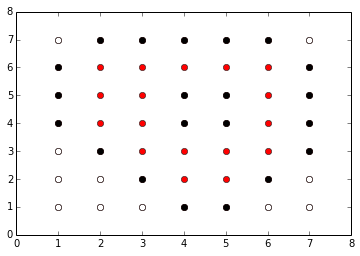

In [14]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

for i in range(7):
    for j in range(7):
        ax.plot([i+1], [j+1], marker = 'o', color = 'r')
ax.plot([3], [2], marker = 'o', color = 'k')
ax.plot([2], [3], marker = 'o', color = 'k')
ax.plot([1], [4], marker = 'o', color = 'k')
ax.plot([1], [5], marker = 'o', color = 'k')
ax.plot([1], [6], marker = 'o', color = 'k')
ax.plot([2], [7], marker = 'o', color = 'k')
ax.plot([3], [7], marker = 'o', color = 'k')
ax.plot([4], [7], marker = 'o', color = 'k')
ax.plot([5], [7], marker = 'o', color = 'k')
ax.plot([7], [5], marker = 'o', color = 'k')
ax.plot([7], [4], marker = 'o', color = 'k')
ax.plot([7], [3], marker = 'o', color = 'k')
ax.plot([6], [2], marker = 'o', color = 'k')
ax.plot([5], [1], marker = 'o', color = 'k')
ax.plot([4], [1], marker = 'o', color = 'k')
ax.plot([4], [4], marker = 'o', color = 'k')
ax.plot([4], [5], marker = 'o', color = 'k')
ax.plot([5], [4], marker = 'o', color = 'k')
ax.plot([5], [5], marker = 'o', color = 'k')
ax.plot([1], [1], marker = 'o', color = 'w')
ax.plot([1], [2], marker = 'o', color = 'w')
ax.plot([2], [1], marker = 'o', color = 'w')
ax.plot([2], [2], marker = 'o', color = 'w')
ax.plot([1], [3], marker = 'o', color = 'w')
ax.plot([3], [1], marker = 'o', color = 'w')
ax.plot([1], [7], marker = 'o', color = 'w')
ax.plot([6], [1], marker = 'o', color = 'w')
ax.plot([7], [1], marker = 'o', color = 'w')
ax.plot([7], [2], marker = 'o', color = 'w')
ax.plot([7], [7], marker = 'o', color = 'w')
ax.plot([7], [6], marker = 'o', color = 'k')
ax.plot([6], [7], marker = 'o', color = 'k')

ax.set_ybound(0,8)
ax.set_xbound(0,8)

plt.show()

So I think rather than dealing with this complicated boundary, let's start with a really simple one:

<b>Example 1.</b> Now we consider a finite subset of Z with boundary conditions at the
ends. We take A to be {1, . . . , N − 1} and ∂A to be {0, N}. Let F(0) = a and
F(N) = b.

<b>Theorem 5.1.</b> Given the above conditions, the only function F that is harmonic
on A is

$$F(x) = a +\frac {x(b − a)} N$$

<b>Proof.</b> It is easy to see that F is harmonic. In this case, LF(x) = 0 is equivalent
to saying
$$\frac 1 2 [F(x + 1) − F(x − 1)] = F(x),$$

which is true for the F(x) given in Thm. 5.1.

By Theorem 4.1, this is the unique solution. 

In [15]:
def make_string_graph(n):
    out = [[0 for i in range(n)] for j in range(n)]
    for i in range(n-1):
        out[i][i+1] = 1
        out[i+1][i] = 1
    out[0][0] = 1
    out[0][1] = 0
    out[n-1][n-2] = 0
    out[n-1][n-1] = 1
    return array(out) 

n = 4
A = make_string_graph(n) 
L = diag(sum(A, axis = 1)) - A
eig(L)

(array([ 3.,  1.,  0.,  0.]),
 array([[ 0.        ,  0.        ,  0.80178373,  0.        ],
        [-0.70710678,  0.70710678,  0.53452248,  0.26726124],
        [ 0.70710678,  0.70710678,  0.26726124,  0.53452248],
        [ 0.        ,  0.        ,  0.        ,  0.80178373]]))

hmmm... not really seeing the answer that I'm looking for here. I'm not sure how to incorporate the boundary conditions into the Laplacian. Totally found it now, thanks to Ehsan

In [16]:
n = 8
A = make_string_graph(n)/2
A[0][0] = 1
A[n-1][n-1] = 1
L = (diag(sum(A, axis = 1)) - A)
#L[0][0] = 1
#L[n-1][n-1] = 1
print(L)
#L_inv = inv(L)
def diffuse(state, steps):
    for s in range(steps):
        #print(around(state,4))
        new_state = dot(A, state) 
        state = new_state         
        
    return array(state)    

diffuse([5,0,0,0,0,0,0,0], 100)

[[ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  1.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -0.5  1.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -0.5  1.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -0.5  1.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -0.5  1.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -0.5  1.  -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]


array([ 5.        ,  4.28567203,  3.57135997,  2.85704791,  2.1427716 ,
        1.42849529,  0.71424764,  0.        ])

In [17]:
eig(L)[1][:,6]*(5/eig(L)[1][:,6][0])

array([ 5.        ,  4.28571429,  3.57142857,  2.85714286,  2.14285714,
        1.42857143,  0.71428571,  0.        ])

In [18]:
def make_sq_lattice_w_boundary(n_init):
    n = n_init + 2 #this includes corners, which we do not actually need
    #but the corners just make everything a little easier to work with, so included
    nn = (n)**2
    out = [[0 for i in range(nn)] for j in range(nn)]
    for i in range(1,n -1):
        for j in range(1, n -1):
            if(j+1 < n):
                out[n*i+j][n*i+j+1] = 1.0
            if(j-1 >= 0):
                out[n*i+j][n*i+j-1] = 1.0
            if(i+1 < n):
                out[n*i+j][n*(i+1)+j] = 1.0
            if(i-1 >= 0):
                out[n*i+j][n*(i-1)+j] = 1.0
    for i in range(n):
        out[i][i] = 1
        out[nn-1-i][nn-1-i] = 1
        out[i*n][i*n] = 1
        out[(i+1)*n-1][(i+1)*n-1] = 1
    out = array(out)    
    for i in range(nn):
        degree = sum(out[i])
        out[i] = out[i]/degree
        
    return array(out)
G = make_sq_lattice_w_boundary(1)
G

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.25,  0.  ,  0.25,  0.  ,  0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

In [19]:
def diffuse2(A,state, steps):
    for s in range(steps):
        #print(around(state,4))
        new_state = dot(A, state) 

        state = new_state         
        
    return array(state)    
G = make_sq_lattice_w_boundary(2)
diffuse2(G,[5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0], 100)

array([ 5.   ,  5.   ,  5.   ,  5.   ,  0.   ,  1.875,  1.875,  0.   ,
        0.   ,  0.625,  0.625,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [20]:
L = (diag(sum(G, axis = 1)) - G)
around(eig(L)[1][:,0],3)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0.5,  0. ,  0. ,  0.5,  0.5,
        0. ,  0. ,  0. ,  0. ,  0. ])

##Neumann Boundary Conditions

In [39]:
def make_string_graph_neumann(n):
    out = [[0 for i in range(n)] for j in range(n)]
    for i in range(n-1):
        out[i][i+1] = 1/2
        out[i+1][i] = 1/2
    out[0][0] = 1/2
    out[0][1] = -1/2
    out[n-1][n-2] = -1/2
    out[n-1][n-1] = 1/2
    return array(out) 

n = 5
A = make_string_graph_neumann(n)
print(A)
L = diag(sum(A, axis = 1)) - A
#print(L)
#eig(L)
def diffuse(state, steps):
    for s in range(steps):
        print(around(state,4))
        new_state = dot(A, state) 
        state = new_state  
        state[0] = -state[1]
        state[len(state)-1] = -state[len(state)-2]
        
    return array(state)    

diffuse([0,2,4,2,0], 10)

[[ 0.5 -0.5  0.   0.   0. ]
 [ 0.5  0.   0.5  0.   0. ]
 [ 0.   0.5  0.   0.5  0. ]
 [ 0.   0.   0.5  0.   0.5]
 [ 0.   0.   0.  -0.5  0.5]]
[0 2 4 2 0]
[-2.  2.  2.  2. -2.]
[-0.  0.  2.  0. -0.]
[-1.  1.  0.  1. -1.]
[ 0.5 -0.5  1.  -0.5  0.5]
[-0.75  0.75 -0.5   0.75 -0.75]
[ 0.625 -0.625  0.75  -0.625  0.625]
[-0.6875  0.6875 -0.625   0.6875 -0.6875]
[ 0.6562 -0.6562  0.6875 -0.6562  0.6562]
[-0.6719  0.6719 -0.6562  0.6719 -0.6719]


array([ 0.6640625, -0.6640625,  0.671875 , -0.6640625,  0.6640625])